In [0]:
import warnings
warnings.simplefilter('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import sys
sys.path.insert(0, '/content/drive/My Drive/Colab Notebooks/Capston/')
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import figure
import glob
import numpy as np
#import tqdm as tqdm
from tqdm import tqdm_notebook as tqdm
from random import shuffle
from DDUtil import *
from ml_util import load_dataset2

In [4]:
from keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras.models import load_model

Using TensorFlow backend.


In [0]:
class_name = np.array(['0_water', '1_meal', '2_toilet', '3_noise'])
n_classes = class_name.shape[0]
to_Train = False

In [6]:
data_root='/content/drive/My Drive/Colab Notebooks/Capston/data'
#vclass, vidxs =load_dataset2(folderfmt=data_root+'/*_small/')

['/content/drive/My Drive/Colab Notebooks/Capston/data/0_small/'
 '/content/drive/My Drive/Colab Notebooks/Capston/data/1_small/'
 '/content/drive/My Drive/Colab Notebooks/Capston/data/2_small/'
 '/content/drive/My Drive/Colab Notebooks/Capston/data/3_small/']


In [0]:
data = []
for i in range(len(vidxs)):
    for j in range(len(vidxs[i])):
        cl1 = '{}'.format(vidxs[i][j])
        fn1 = vclass[i][j]
        #print(i, j,fn1 , cl1)
        data1 = [fn1, cl1]
        data.append(data1) 

In [28]:
print(data)

[['/content/drive/My Drive/Colab Notebooks/Capston/data/0_small/water1.png', '0'], ['/content/drive/My Drive/Colab Notebooks/Capston/data/0_small/water10.png', '0'], ['/content/drive/My Drive/Colab Notebooks/Capston/data/0_small/water100.png', '0'], ['/content/drive/My Drive/Colab Notebooks/Capston/data/0_small/water101.png', '0'], ['/content/drive/My Drive/Colab Notebooks/Capston/data/0_small/water102.png', '0'], ['/content/drive/My Drive/Colab Notebooks/Capston/data/0_small/water103.png', '0'], ['/content/drive/My Drive/Colab Notebooks/Capston/data/0_small/water104.png', '0'], ['/content/drive/My Drive/Colab Notebooks/Capston/data/0_small/water105.png', '0'], ['/content/drive/My Drive/Colab Notebooks/Capston/data/0_small/water106.png', '0'], ['/content/drive/My Drive/Colab Notebooks/Capston/data/0_small/water107.png', '0'], ['/content/drive/My Drive/Colab Notebooks/Capston/data/0_small/water108.png', '0'], ['/content/drive/My Drive/Colab Notebooks/Capston/data/0_small/water109.png', 

In [0]:
df = pd.DataFrame(data, columns = ['ID', 'Class']) 

In [19]:
base_dir_out = '/content/drive/My Drive/Colab Notebooks/Capston/data'
outDir = '{}/cnn_CL{}'.format(base_dir_out, n_classes)
fnmodel=outDir+'/model3.h5'
print(fnmodel)

/content/drive/My Drive/Colab Notebooks/Capston/data/cnn_CL4/model3.h5


In [20]:
if not to_Train:
    if not os.path.isfile(fnmodel):
        to_Train = True
        print('Model file {} not exists !!'.format(fnmodel))
        print('Setting to_Train --> {}'.format(to_Train))

    else:
        print('Model file Okay : {}  !!'.format(fnmodel))
        #model.load(fnmodel)
else:
  print("no")

Model file Okay : /content/drive/My Drive/Colab Notebooks/Capston/data/cnn_CL4/model3.h5  !!


In [21]:
%%time
#STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
if to_Train:
    hist = model.fit_generator(generator=train_generator,
                        steps_per_epoch=STEP_SIZE_TRAIN,
                        validation_data=valid_generator,
                        validation_steps=STEP_SIZE_VALID,
                        epochs=100)
    
    model.save(fnmodel)
    print('Saved the trained model {}.. okay'.format(fnmodel))
else:
    model = load_model(fnmodel)
    print('Loaed a model {}.. okay'.format(fnmodel))

Loaed a model /content/drive/My Drive/Colab Notebooks/Capston/data/cnn_CL4/model3.h5.. okay
CPU times: user 991 ms, sys: 39.8 ms, total: 1.03 s
Wall time: 1.04 s


In [22]:
 %%time
model = load_model(fnmodel)
print('Loaed a model {}.. okay'.format(fnmodel))

Loaed a model /content/drive/My Drive/Colab Notebooks/Capston/data/cnn_CL4/model3.h5.. okay
CPU times: user 892 ms, sys: 25.6 ms, total: 918 ms
Wall time: 938 ms


In [23]:
df_copy = df.copy()
do_split = False
if do_split:
    traindf = df_copy.sample(frac=0.75, random_state=0)
    testdf = df_copy.drop(traindf.index)
else: # split will be done in ImageDataGenerator function
    # https://www.geeksforgeeks.org/different-ways-to-create-pandas-dataframe/
    print('Data split will be done in ImageDataGenerator function')
    traindf = df.sample(frac=1).reset_index(drop=True)

Data split will be done in ImageDataGenerator function


In [24]:
#directory = base_dir_out+'_train'
datagen=ImageDataGenerator(rescale=1./255.,validation_split=0.25)
directory = './' 
print(directory)
valid_generator=datagen.flow_from_dataframe(
    dataframe=traindf,
    directory=directory,#directory="/kaggle/working/train/",
    x_col="ID",
    y_col="Class",
    subset="validation",
    batch_size=32,
    seed=42,
    shuffle=True,
    class_mode="categorical",
    target_size=(64,64))

./
Found 1410 validated image filenames belonging to 4 classes.


In [0]:
STEP_SIZE_VALID=int(np.ceil(valid_generator.n/valid_generator.batch_size))

In [27]:
v = model.evaluate_generator(generator=valid_generator, steps=STEP_SIZE_VALID)

KeyboardInterrupt: ignored

In [0]:
eval_acc = v[1]
print("acc : ",eval_acc)

acc :  0.984375


In [0]:
ttl2 = 'CNN, Acc = {:.2f}%'.format(100.0*eval_acc)

In [29]:
pred_generator=datagen.flow_from_dataframe(
    dataframe=traindf,
    directory=directory,#directory="/kaggle/working/train/",
    x_col="ID",
    y_col= "Class",#None,
    subset="validation",
    batch_size=32,
    shuffle=False,
    class_mode='categorical',
    target_size=(64,64))

Found 1410 validated image filenames belonging to 4 classes.


In [0]:
pred_generator.reset()

In [0]:
v = model.predict_generator(generator=pred_generator, steps=STEP_SIZE_VALID)

In [33]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
#print(valid_generator.class_indices)
#print(v)
a=0
success=0
fail=0
for i in range(5):
  print("{} -- {}".format(v[i], pred_generator.filenames[i][61:]))
  print("Predict : {} Label : {}".format(np.argmax(v[i]), pred_generator.labels[i]))
  if np.argmax(v[i]) == valid_generator.labels[i]:
    success+=1
  else:
    fail+=1
print("Success to predict {} files".format(success))
print("Fail to predict {} files".format(fail))

[0.000 1.000 0.000 0.000] -- meal513.png
Predict : 1 Label : 1
[0.000 1.000 0.000 0.000] -- meal_music243.png
Predict : 1 Label : 1
[0.000 1.000 0.000 0.000] -- meal_music279.png
Predict : 1 Label : 1
[0.000 0.000 1.000 0.000] -- toilet_aug301.png
Predict : 2 Label : 2
[0.004 0.992 0.003 0.001] -- meal369.png
Predict : 1 Label : 1
Success to predict 5 files
Fail to predict 0 files


In [0]:
import pandas as pd
vpred = np.argmax(v, axis=1)
expected = pred_generator.classes
expected = np.array(expected)
print(np.shape(expected))
conf_matrix = pd.crosstab(expected, vpred) 
print(conf_matrix)

(384,)
col_0    0    1   2   3
row_0                  
0      199    0   0   0
1        1  111   0   0
2        0    0  43   0
3        2    0   3  25


In [0]:
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.utils.multiclass import unique_labels

In [0]:
def plot_confusion_matrix2(actual, predicted, classes, normalize=True, title='Confusion Matrix', cmap=plt.cm.viridis):
    #conf_matrix = pd.crosstab(actual, predicted)  # confusion_matrix(actual, predicted)
    
    conf_matrix = confusion_matrix(actual, predicted)
    classes = classes[unique_labels(actual, predicted)]
    if normalize:
        conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] *100
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots(figsize=(8, 8), dpi=80)
    #plt.figure(figsize=(8, 8))
    plt.imshow(conf_matrix, interpolation='nearest', cmap=cmap)  # , cmap=plt.cm.Greens
    plt.title(title, size=12)
    plt.colorbar(fraction=0.05, pad=0.05)
    tick_marks = np.arange(len(classes), len(classes))
    #tick_marks = np.arange(len(classes))
    #plt.xticks(tick_marks, classes, rotation=0)
    plt.xticks(np.arange(4), ('0_water', '1_meal', '2_toilet', '3_noise'))
    #plt.yticks(np.arange(2), ('C0', 'C1'))
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = conf_matrix.max() / 2.
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            plt.text(j, i, format(conf_matrix[i, j], fmt),
                     ha="center", va="center", color="white" if conf_matrix[i, j] > thresh else "black")  #horizontalalignment
    fig.tight_layout()
   
    
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.grid(False)
    plt.show()

Normalized confusion matrix


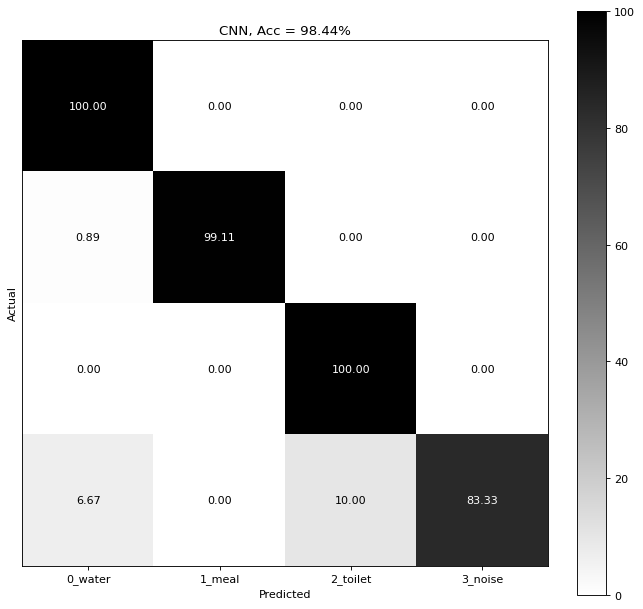

In [0]:
plot_confusion_matrix2(expected, vpred, class_name, title=ttl2, cmap = 'binary' )